# Explainable AI

Data from: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
!pip install shap
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
from lime import lime_tabular

In [3]:
df = pd.read_csv("housing.csv")
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
total_bedrooms,1.002907
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity_<1H OCEAN,0.000000


In [5]:
df = df.dropna()[:1000]
X = df.drop(['median_house_value'], axis = 1)
Y = df['median_house_value']

st = StandardScaler()
X_sc = st.fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sc, Y, test_size = 0.30, random_state = 101)

RMSE:  37613.940083304755


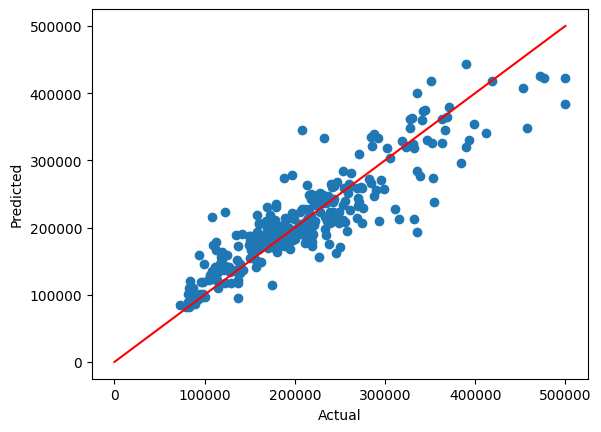

In [6]:
regr = RandomForestRegressor(random_state=0).fit(X_Train, Y_Train)
y_test_pred = regr.predict(X_Test)

print("RMSE: ", mean_squared_error(Y_Test, y_test_pred, squared=False)) # Using RMSE
plt.scatter(Y_Test, y_test_pred)
plt.plot([0, 500000], [0, 500000], color='r', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## SHAP

In [7]:
explainer = shap.TreeExplainer(regr, X_Train)
shap_values = explainer(X_Test, check_additivity=False)
exp = shap.Explanation(shap_values.values, 
                       shap_values.base_values, 
                       data=X_Test, 
                       feature_names=X.columns)

 95%|=================== | 284/300 [00:12<00:00]       

### Waterfall Plot

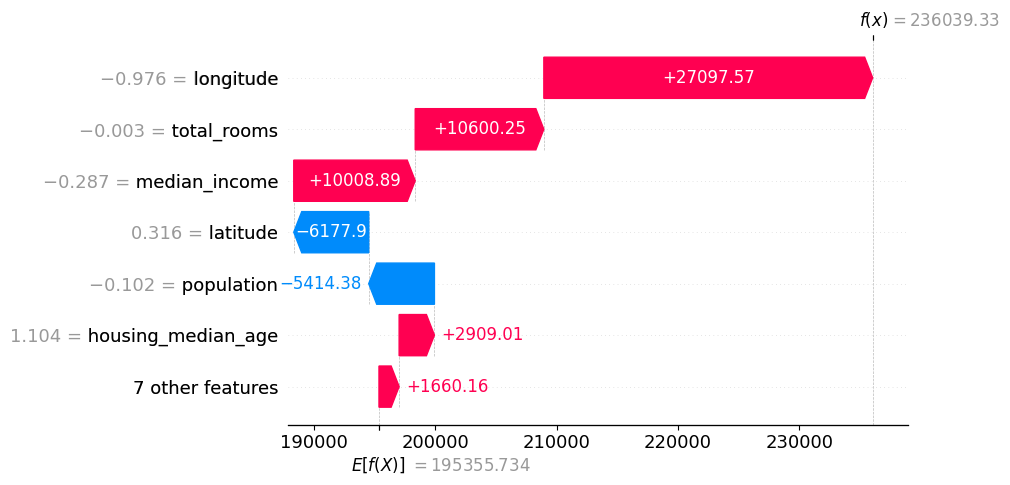

In [8]:
shap.plots.waterfall(exp[0], max_display=7)

### Force Plots

In [9]:
shap.initjs()
shap.plots.force(exp[0])

In [10]:
shap.initjs()
shap.plots.force(exp)

### Mean SHAP Plot

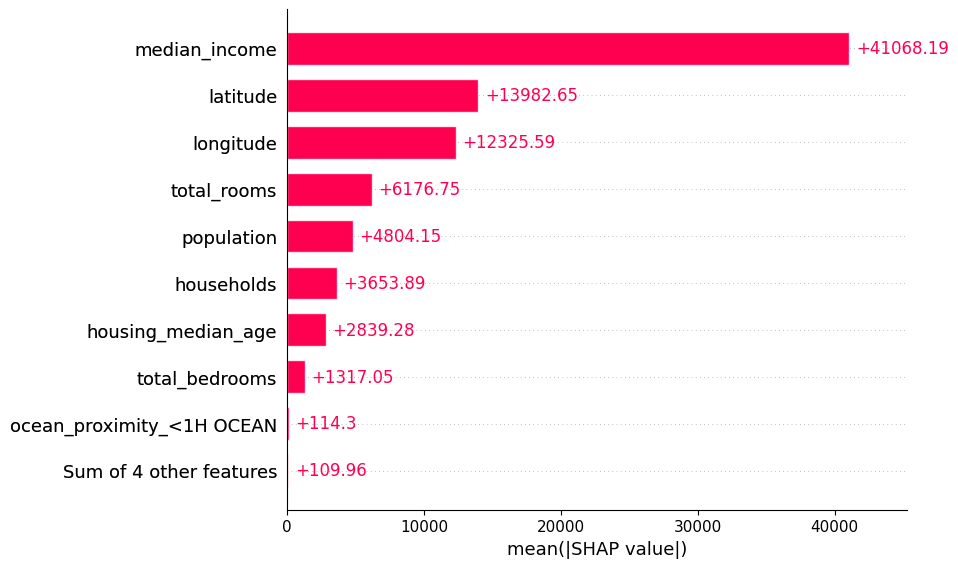

In [11]:
shap.plots.bar(exp)

### Beeswarm Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


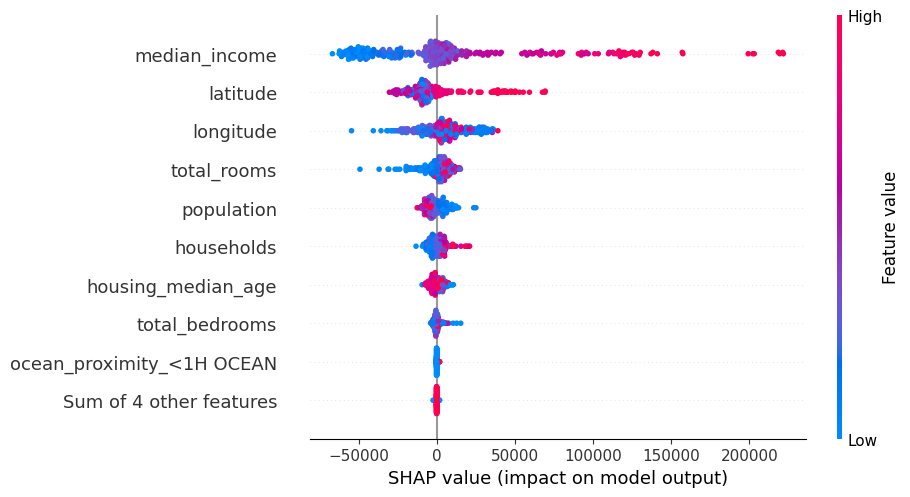

In [12]:
shap.plots.beeswarm(exp)

## LIME

In [13]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_Train),
    feature_names=X.columns,
    class_names=['median_house_value'],
    mode='regression'
)

In [15]:
exp = explainer.explain_instance(
    data_row=X_Test[0], 
    predict_fn=regr.predict,
    num_features=7
)

exp.show_in_notebook(show_table=True)